In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import warnings
from math import exp
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import scale
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Ignore warning messages.
warnings.filterwarnings("ignore") 

# Read data from the csv file and convert it into a dataframe.
df = pd.read_csv('/Users/andrewzhou/Documents/2023 Summer Research/Organized-noavg.csv')

df.head()

,Coordinates and Times,.ALPHA.-ENDOSULFAN,.ALPHA.-HEXACHLOROCYCLOHEXANE,.BETA.-ENDOSULFAN,.BETA.-HEXACHLOROCYCLOHEXANE,.DELTA.-HEXACHLOROCYCLOHEXANE,.LAMBDA.-CYHALOTHRIN,"1-(3,4-DICHLOROPHENYL)-3-METHYL UREA",1-CHLOROPROPANE,"1,1-DICHLOROETHANE",...,WIND CONDITION (CHOICE LIST),"WIND DIRECTION (DIRECTION FROM, EXPRESSED 0-360 DEG)",WIND DIRECTION FROM (CHOICE LIST),WIND SPEED (CHOICE LIST),WIND VELOCITY,XYLENE,YTTERBIUM,YTTRIUM,ZINC,ZOXAMIDE
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8/30/22 14:53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,(blank),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,18.41459765,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#look at the tail of the dataframe
df.info()

In [112]:
df.drop(columns='Coordinates and Times',axis=1,inplace=True)
df.drop(columns='ORTHOPHOSPHATE',axis=1,inplace=True)


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69031 entries, 0 to 69030
Columns: 712 entries, .ALPHA.-ENDOSULFAN to ZOXAMIDE
dtypes: float64(712)
memory usage: 375.0 MB


In [ ]:
#df['NITROGEN, MIXED FORMS (NH3), (NH4), ORGANIC, (NO2) AND (NO3)'] = pd.to_numeric(df['NITROGEN, MIXED FORMS (NH3), (NH4), ORGANIC, (NO2) AND (NO3)'], errors='coerce')
#df = df.replace(np.nan, 0, regex=True)
#df.info

In [ ]:
#df['CHLOROPHYLL A, UNCORRECTED FOR PHEOPHYTIN'] = pd.to_numeric(df['CHLOROPHYLL A, UNCORRECTED FOR PHEOPHYTIN'], errors='coerce')
#df = df.replace(np.nan, 0, regex=True)
#df.info

In [113]:
df=df.astype('float')
#df = df.replace(np.nan,10000000000,regex=True)
df.dtypes


.ALPHA.-ENDOSULFAN               float64
.ALPHA.-HEXACHLOROCYCLOHEXANE    float64
.BETA.-ENDOSULFAN                float64
.BETA.-HEXACHLOROCYCLOHEXANE     float64
.DELTA.-HEXACHLOROCYCLOHEXANE    float64
                                  ...   
XYLENE                           float64
YTTERBIUM                        float64
YTTRIUM                          float64
ZINC                             float64
ZOXAMIDE                         float64
Length: 712, dtype: object

In [ ]:
#df.plot(kind = 'scatter', y = 'NITROGEN, MIXED FORMS (NH3), (NH4), ORGANIC, (NO2) AND (NO3)', x = 'CHLOROPHYLL A, UNCORRECTED FOR PHEOPHYTIN',ylim=(0,4000),xlim=(0,700))
#plt.show()

In [ ]:
#Splitting into train and test sets
X=df.loc[:,df.columns != 'NITROGEN, MIXED FORMS (NH3), (NH4), ORGANIC, (NO2) AND (NO3)']     
X.info()
Y=df['NITROGEN, MIXED FORMS (NH3), (NH4), ORGANIC, (NO2) AND (NO3)']  
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state = 1)

In [ ]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_scaled = scaler.transform(X_train)
print(X_scaled.mean(axis=0))
print(X_scaled.std(axis=0))

In [ ]:
from sklearn.linear_model import LinearRegression


model = LinearRegression()
model.fit(X_train, Y_train)
train_accuracy = model.score(X_train, Y_train)
print(f'The accuracy for the training set is {100 * train_accuracy:.2f}%')
test_accuracy = model.score(X_test, Y_test)
print(f'The accuracy for the test set is {100 * test_accuracy:.2f}%')


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot

model = RandomForestRegressor()


model.fit(X_train, Y_train)
train_accuracy = model.score(X_train, Y_train)
print(f'The accuracy for the training set is {100 * train_accuracy:.2f}%')
test_accuracy = model.score(X_test, Y_test)
print(f'The accuracy for the test set is {100 * test_accuracy:.2f}%')



In [ ]:
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [ ]:
important_features = pd.Series(data=model.feature_importances_,index=X_train.columns)
important_features.sort_values(ascending=False,inplace=True)
print(important_features)

New dataframe with only important features 

In [114]:
sdf = pd.DataFrame()
sdf['NITROGEN, MIXED FORMS (NH3), (NH4), ORGANIC, (NO2) AND (NO3)'] = df['NITROGEN, MIXED FORMS (NH3), (NH4), ORGANIC, (NO2) AND (NO3)']
sdf['PHOSPHORUS'] = df['PHOSPHORUS']
sdf['CHLOROPHYLL A, UNCORRECTED FOR PHEOPHYTIN'] = df['CHLOROPHYLL A, UNCORRECTED FOR PHEOPHYTIN']
sdf['DEPTH, SECCHI DISK DEPTH'] = df['DEPTH, SECCHI DISK DEPTH']
sdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69031 entries, 0 to 69030
Data columns (total 4 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   NITROGEN, MIXED FORMS (NH3), (NH4), ORGANIC, (NO2) AND (NO3)  4052 non-null   float64
 1   PHOSPHORUS                                                    9970 non-null   float64
 2   CHLOROPHYLL A, UNCORRECTED FOR PHEOPHYTIN                     3998 non-null   float64
 3   DEPTH, SECCHI DISK DEPTH                                      12053 non-null  float64
dtypes: float64(4)
memory usage: 2.1 MB


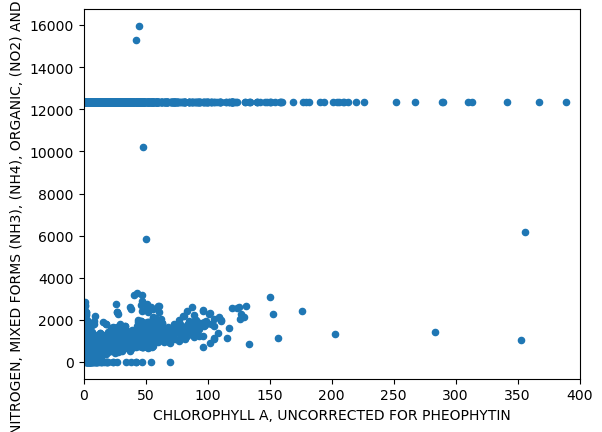

In [116]:
sdf = sdf.replace(np.nan,12345,regex=True)
sdf.head()
sdf.plot(kind = 'scatter', y = 'NITROGEN, MIXED FORMS (NH3), (NH4), ORGANIC, (NO2) AND (NO3)', x = 'CHLOROPHYLL A, UNCORRECTED FOR PHEOPHYTIN',xlim=(0,400))
plt.show()

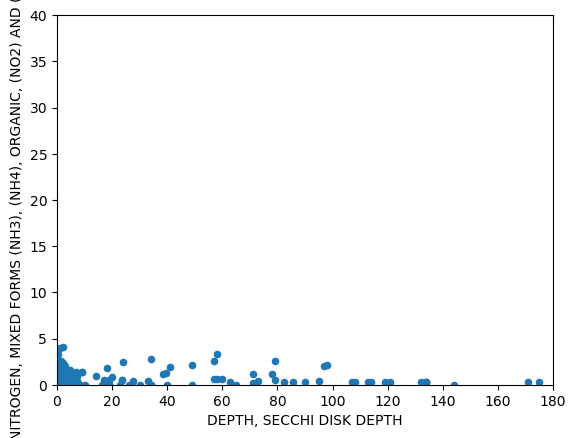

In [117]:
sdf.plot(kind = 'scatter', y = 'NITROGEN, MIXED FORMS (NH3), (NH4), ORGANIC, (NO2) AND (NO3)', x = 'DEPTH, SECCHI DISK DEPTH',ylim=(0,40),xlim=(0,180))
plt.show()

In [142]:
sdf = sdf[sdf['NITROGEN, MIXED FORMS (NH3), (NH4), ORGANIC, (NO2) AND (NO3)'].between(0, 3500)]
sdf = sdf[sdf['PHOSPHORUS'].between(0, 500)]
sdf = sdf[sdf['CHLOROPHYLL A, UNCORRECTED FOR PHEOPHYTIN'].between(0, 180)]
sdf = sdf[sdf['DEPTH, SECCHI DISK DEPTH'].between(0, 180)]

<Axes: xlabel='PHOSPHORUS', ylabel='NITROGEN, MIXED FORMS (NH3), (NH4), ORGANIC, (NO2) AND (NO3)'>

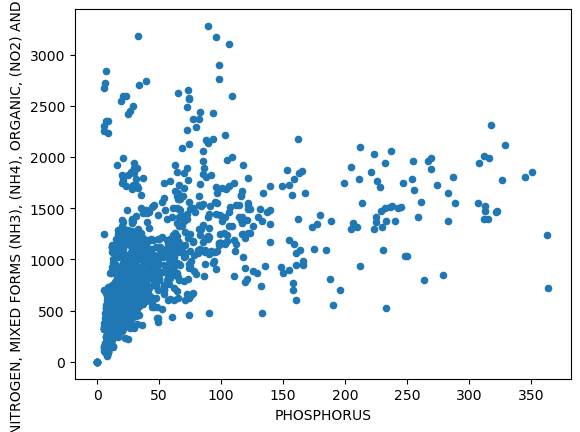

In [119]:
sdf.plot(kind = 'scatter', y = 'NITROGEN, MIXED FORMS (NH3), (NH4), ORGANIC, (NO2) AND (NO3)', x = 'PHOSPHORUS')

In [166]:
#Making train and test sets only from important features
X=sdf.loc[:,sdf.columns != 'NITROGEN, MIXED FORMS (NH3), (NH4), ORGANIC, (NO2) AND (NO3)']     
X.info()
Y=sdf['NITROGEN, MIXED FORMS (NH3), (NH4), ORGANIC, (NO2) AND (NO3)']  
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.4,random_state = 1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2005 entries, 9 to 52176
Data columns (total 3 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   PHOSPHORUS                                 2005 non-null   float64
 1   CHLOROPHYLL A, UNCORRECTED FOR PHEOPHYTIN  2005 non-null   float64
 2   DEPTH, SECCHI DISK DEPTH                   2005 non-null   float64
dtypes: float64(3)
memory usage: 62.7 KB


In [172]:
#Model Accuracy with only 3 most important features
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot

model = RandomForestRegressor(random_state=True,warm_start=True,criterion='absolute_error',max_depth=100)


model.fit(X_train, Y_train)
train_accuracy = model.score(X_train, Y_train)
print(f'The accuracy for the training set is {100 * train_accuracy:.2f}%')
test_accuracy = model.score(X_test, Y_test)
print(f'The accuracy for the test set is {100 * test_accuracy:.2f}%')

The accuracy for the training set is 93.27%
The accuracy for the test set is 70.57%


In [169]:
from sklearn.neighbors import KNeighborsRegressor


model = KNeighborsRegressor()


model.fit(X_train, Y_train)
train_accuracy = model.score(X_train, Y_train)
print(f'The accuracy for the training set is {100 * train_accuracy:.2f}%')
test_accuracy = model.score(X_test, Y_test)
print(f'The accuracy for the test set is {100 * test_accuracy:.2f}%')

The accuracy for the training set is 68.98%
The accuracy for the test set is 60.46%


In [154]:


from sklearn.tree import DecisionTreeRegressor


model = DecisionTreeRegressor()


model.fit(X_train, Y_train)
train_accuracy = model.score(X_train, Y_train)
print(f'The accuracy for the training set is {100 * train_accuracy:.2f}%')
test_accuracy = model.score(X_test, Y_test)
print(f'The accuracy for the test set is {100 * test_accuracy:.2f}%')

The accuracy for the training set is 98.48%
The accuracy for the test set is 54.04%


In [155]:
from sklearn import svm


model = svm.SVR()
model.fit(X_train, Y_train)
train_accuracy = model.score(X_train, Y_train)
print(f'The accuracy for the training set is {100 * train_accuracy:.2f}%')
test_accuracy = model.score(X_test, Y_test)
print(f'The accuracy for the test set is {100 * test_accuracy:.2f}%')

The accuracy for the training set is 19.23%
The accuracy for the test set is 24.33%


Scaling Test and Train Sets

In [134]:
#Because we separated the input and output previously, if scale them separately
#it can cause inaccurate results. The code below addresses the issue
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = pd.DataFrame(scaler.transform(X_train), columns = X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)
print(X_train_scaled.mean(axis=0))
print(X_test_scaled.mean(axis=0))

PHOSPHORUS                                  -2.214909e-17
CHLOROPHYLL A, UNCORRECTED FOR PHEOPHYTIN    3.322363e-17
DEPTH, SECCHI DISK DEPTH                     2.702189e-16
dtype: float64
PHOSPHORUS                                   0.028946
CHLOROPHYLL A, UNCORRECTED FOR PHEOPHYTIN   -0.000363
DEPTH, SECCHI DISK DEPTH                    -0.007491
dtype: float64


In [136]:
#Model Accuracy with only 3 most important features
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot

model = RandomForestRegressor(criterion='absolute_error')


model.fit(X_train_scaled, Y_train)
train_accuracy = model.score(X_train_scaled, Y_train)
print(f'The accuracy for the training set is {100 * train_accuracy:.2f}%')
test_accuracy = model.score(X_test_scaled, Y_test)
print(f'The accuracy for the test set is {100 * test_accuracy:.2f}%')

The accuracy for the training set is 93.55%
The accuracy for the test set is 68.24%


Cross Validation

In [170]:
from sklearn.model_selection import KFold, ShuffleSplit, cross_val_score

clf = RandomForestRegressor()

k_folds = KFold(n_splits = 10)
cv = ShuffleSplit(n_splits=10,test_size=.2)

scores = cross_val_score(clf, X, Y, cv = cv)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.62994365 0.6593511  0.63844864 0.70673205 0.74931465 0.59460127
 0.67316166 0.59423181 0.68000094 0.65054085]
Average CV Score:  0.6576326626204928
Number of CV Scores used in Average:  10
